# 3. Camera Calibration

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chessboard-dataset-personal/checkerboard_personal/14.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/18.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/16.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/25.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/22.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/24.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/6.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/9.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/11.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/20.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/4.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/5.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/2.jpeg
/kaggle/input/chessboard-dataset-personal/checkerboard_personal/19.jp

In [2]:
input_dir = "/kaggle/input/chessboard-dataset-given/chessboard_dataset/"
# input_dir = "/kaggle/input/chessboard-dataset-personal/checkerboard_personal/"

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import glob
from sklearn.preprocessing import StandardScaler

In [161]:
checkerboard_dim = (8, 6)

world_points = np.zeros((checkerboard_dim[0] * checkerboard_dim[1], 3), np.float32)
world_points[:, :2] = np.mgrid[0:checkerboard_dim[0], 0:checkerboard_dim[1]].T.reshape(-1, 2)

all_world_points = []
all_image_points = []

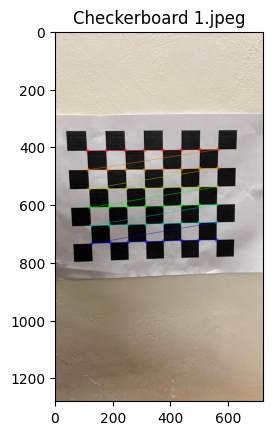

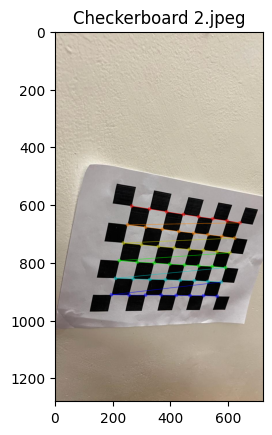

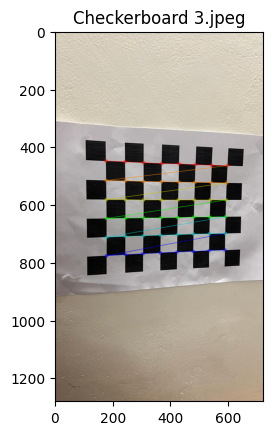

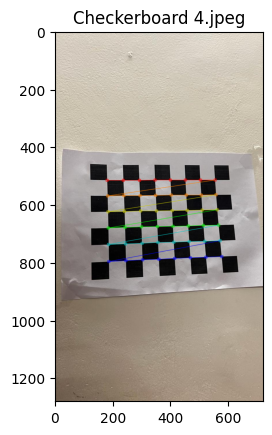

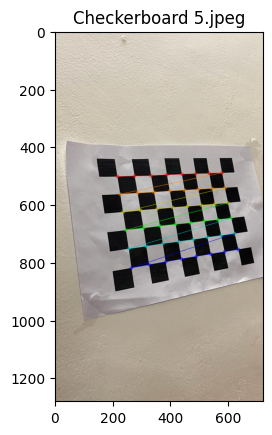

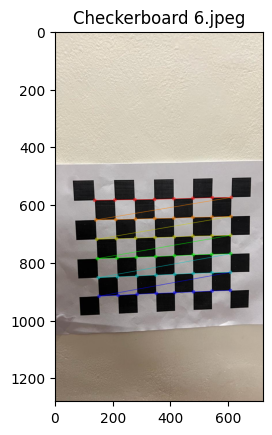

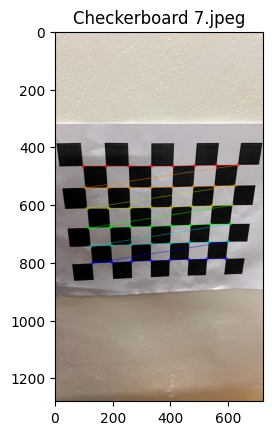

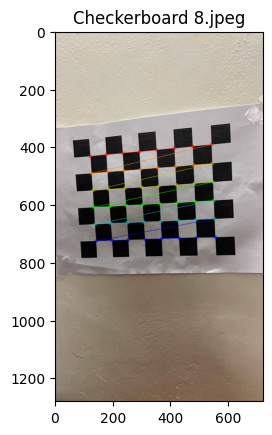

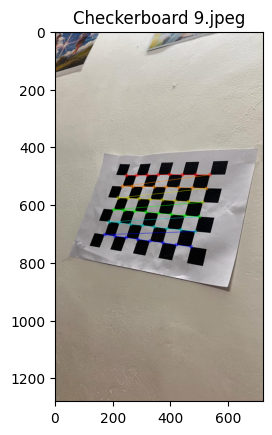

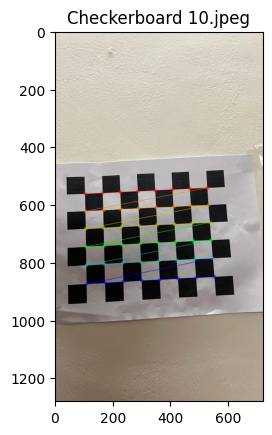

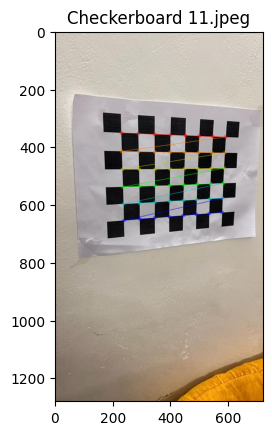

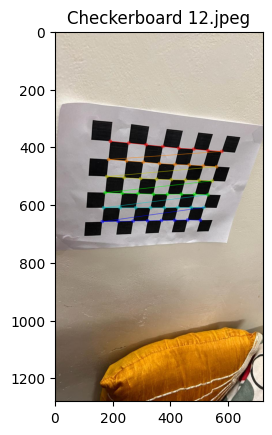

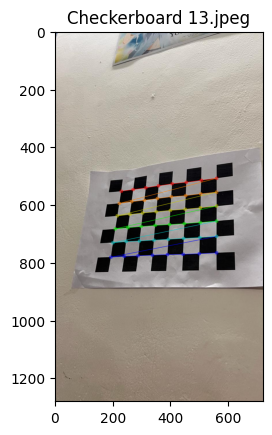

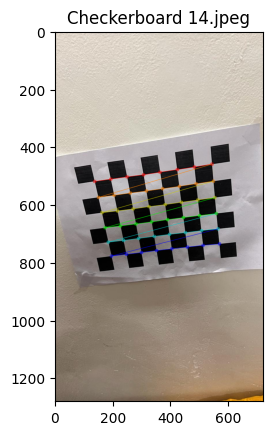

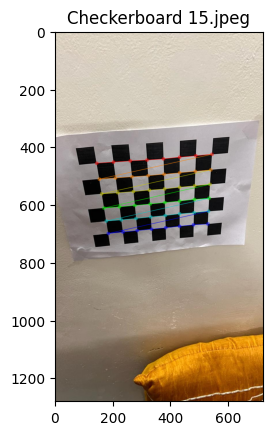

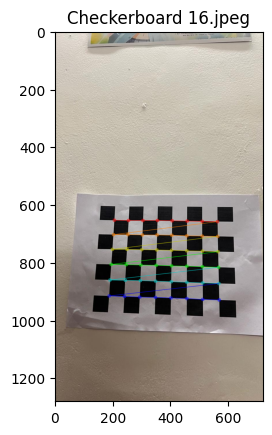

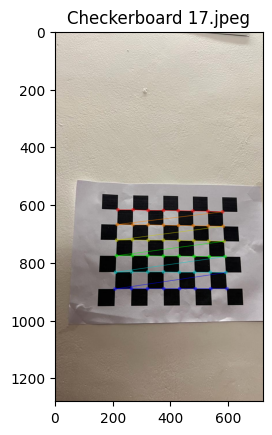

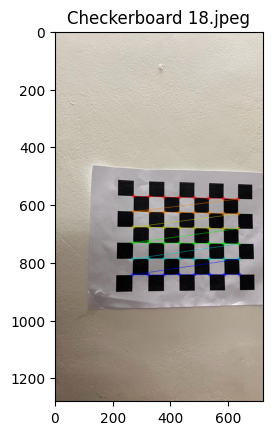

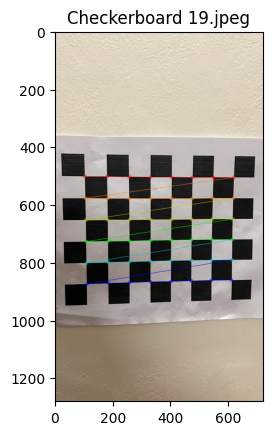

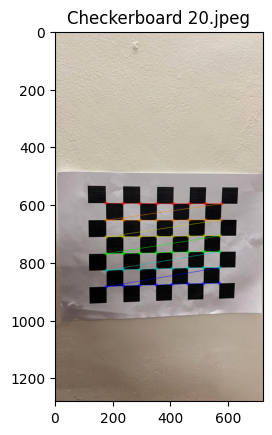

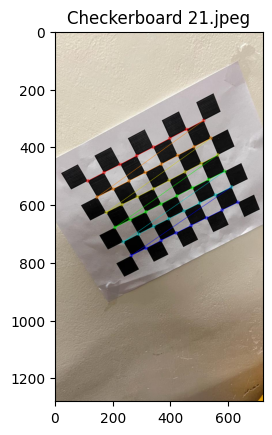

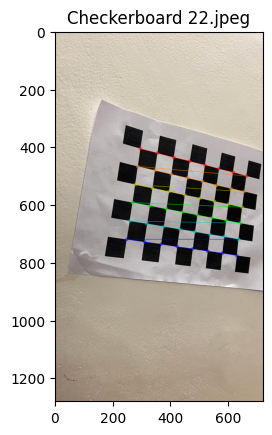

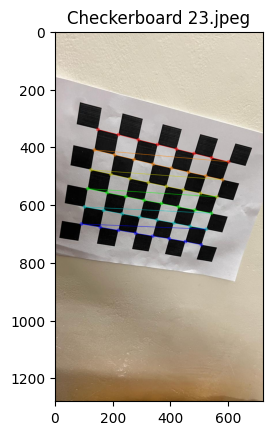

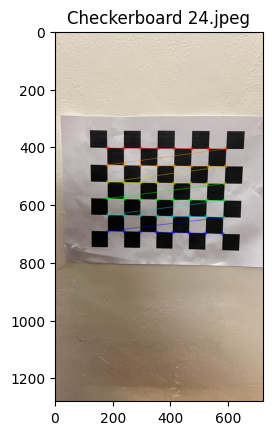

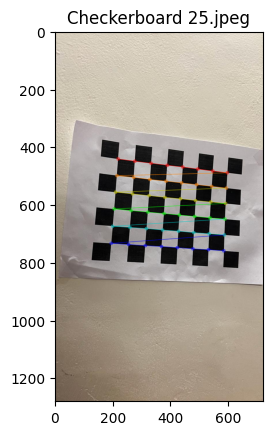

In [162]:
for i in range(1, 26):
    image = cv2.imread(input_dir + f"{i}.jpeg")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    success, corners = cv2.findChessboardCorners(gray_image, checkerboard_dim, None)
    
    if success:
        all_world_points.append(world_points)
        all_image_points.append(corners)

        cv2.drawChessboardCorners(image, checkerboard_dim, corners, success)
        
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Checkerboard {i}.jpeg")
        plt.show()

In [163]:
error, K, distortion, R, t = cv2.calibrateCamera(all_world_points, all_image_points, gray_image.shape[::-1], None, None)

fx, fy, cx, cy, skew = K[0,0], K[1,1], K[0,2], K[1,2], K[0,1]

reproj_image_points = []
errors = []
for i in range(25):
    image_points_new, _ = cv2.projectPoints(all_world_points[i], R[i], t[i], K, distortion)

    cur_error = cv2.norm(all_image_points[i].astype(np.float32), image_points_new.astype(np.float32), cv2.NORM_L2) / len(image_points_new)
    errors.append(cur_error)
    reproj_image_points.append(image_points_new)

reproj_image_points = np.array(reproj_image_points)

In [166]:
print("Intrinsic Camera Matrix:")
print(K)
print(f"Focal Lengths: fx = {fx}, fy = {fy}")
print(f"Principal Point: (cx, cy) = ({cx}, {cy})")
print("Skew Parameter: s =", skew)
print("Reprojection Error:", np.mean(errors))

Intrinsic Camera Matrix:
[[956.00078429   0.         368.87920071]
 [  0.         956.79138954 648.83734178]
 [  0.           0.           1.        ]]
Focal Lengths: fx = 956.0007842949757, fy = 956.791389536468
Principal Point: (cx, cy) = (368.8792007144458, 648.8373417773257)
Skew Parameter: s = 0.0
Reprojection Error: 0.0749840389967154


In [167]:
R_1, _ = cv2.Rodrigues(R[0])
t_1 = t[0]

print("Image 1 Extrinsic Parameters:")
print("Rotation Matrix:")
print(R_1)
print("Translation Vector:")
print(t_1)

Image 1 Extrinsic Parameters:
Rotation Matrix:
[[ 0.99696999  0.01389194 -0.07653662]
 [-0.02499172  0.98896302 -0.14603959]
 [ 0.07366311  0.14750987  0.98631363]]
Translation Vector:
[[-3.93535601]
 [-3.57746406]
 [14.6559933 ]]


In [168]:
R_2, _ = cv2.Rodrigues(R[1])
t_2 = t[1]

print("Image 2 Extrinsic Parameters:")
print("Rotation Matrix:")
print(R_2)
print("Translation Vector:")
print(t_2)

Image 2 Extrinsic Parameters:
Rotation Matrix:
[[ 0.89020699 -0.24204968 -0.38593196]
 [ 0.12308779  0.94345588 -0.30779928]
 [ 0.43861249  0.22650155  0.86966438]]
Translation Vector:
[[-1.49384997]
 [-0.61957713]
 [13.90226389]]


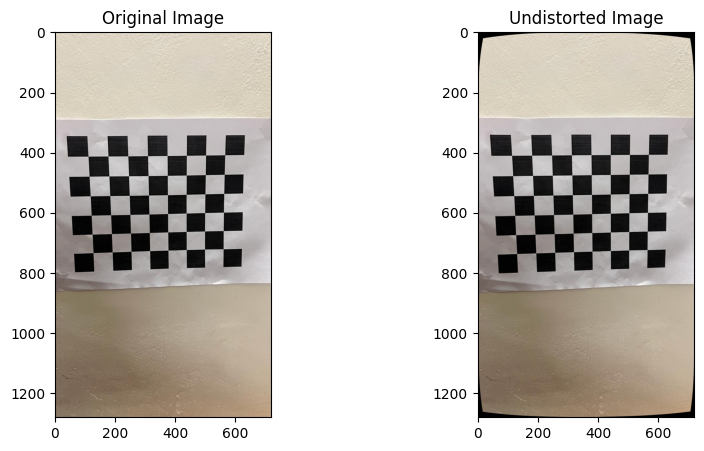

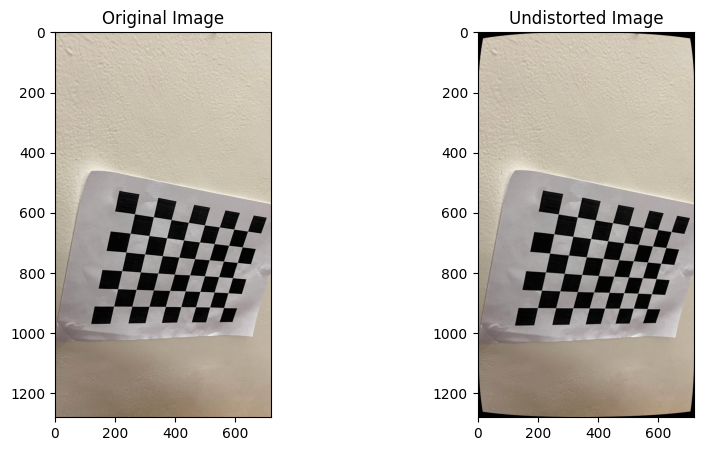

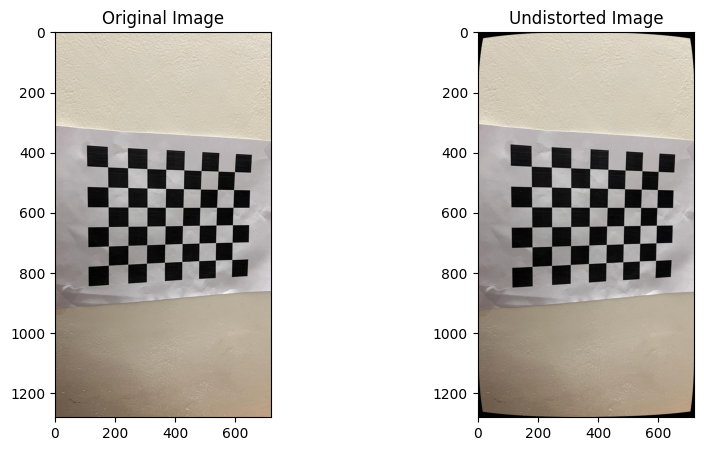

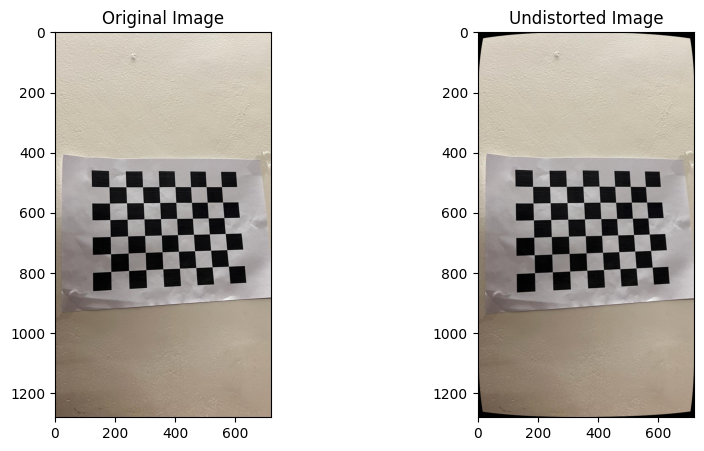

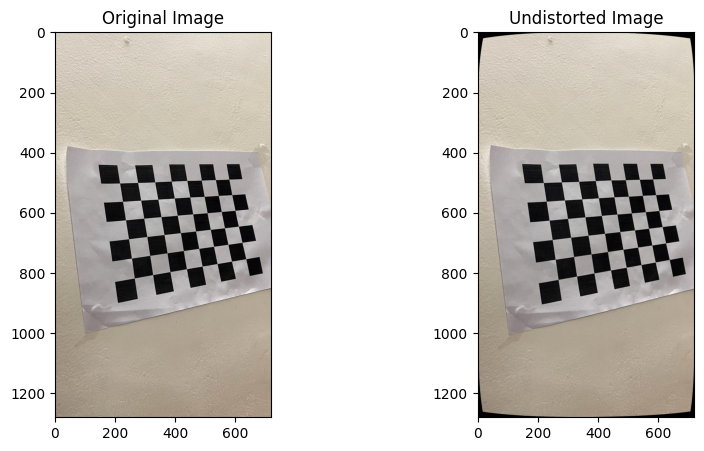

In [169]:
for i in range(1, 6):
    image = cv2.imread(input_dir + f"{i}.jpeg")
    height, width = image.shape[:2]
    K_, region_of_interest = cv2.getOptimalNewCameraMatrix(K, distortion, (width, height), 1, (width, height))
    undistorted_image = cv2.undistort(image, K, distortion, None, K_)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB))
    plt.title("Undistorted Image")
    plt.show()

In [170]:
print(f"Re-projection Error: Mean: {np.mean(errors)}, Std Deviation: {np.std(errors)}")

Re-projection Error: Mean: 0.0749840389967154, Std Deviation: 0.023955528050868088


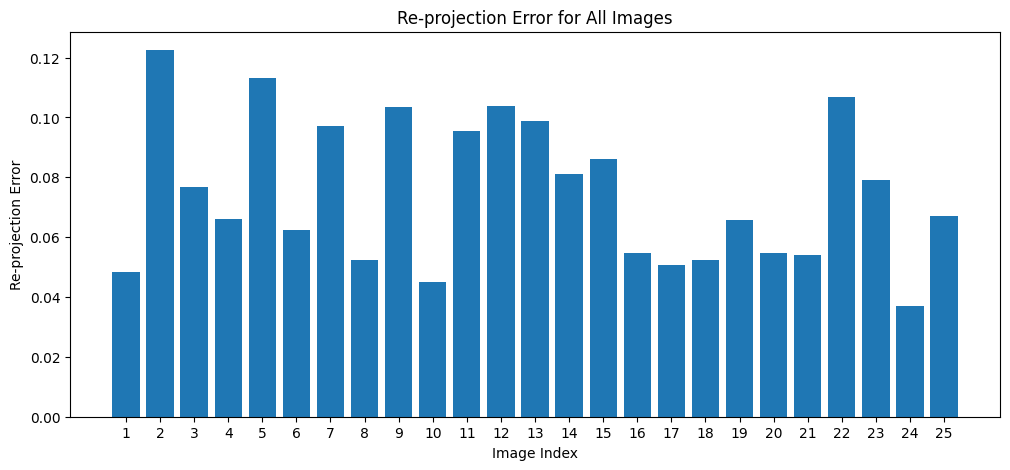

In [171]:
plt.figure(figsize=(12, 5))
plt.bar(range(1, 26), errors)
plt.xlabel("Image Index")
plt.ylabel("Re-projection Error")
plt.xticks(range(1, 26), list(range(1, 26)))
plt.title("Re-projection Error for All Images")
plt.show()

In [158]:
for i in range(25):
    image = cv2.imread(input_dir + f"{i+1}.jpeg")
    print(image.shape)

(1507, 1130, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1200, 1600, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)
(1600, 1200, 3)


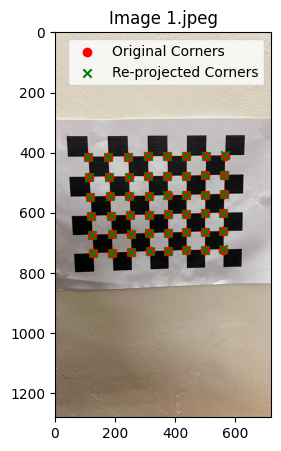

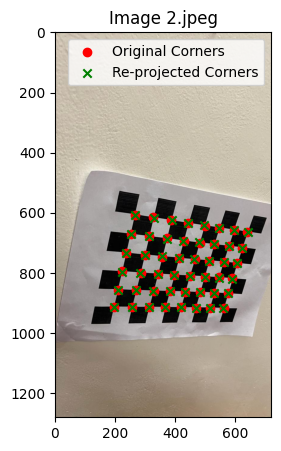

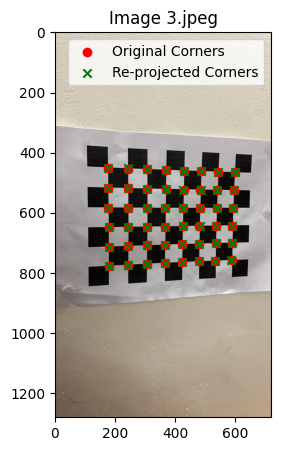

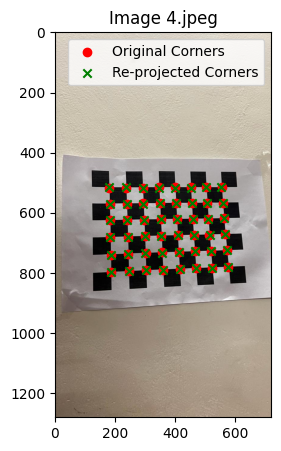

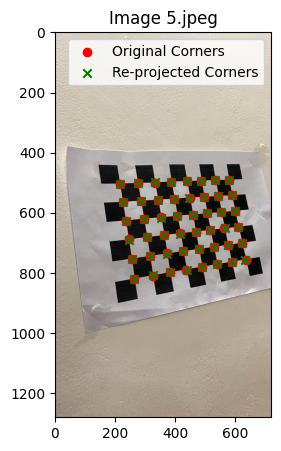

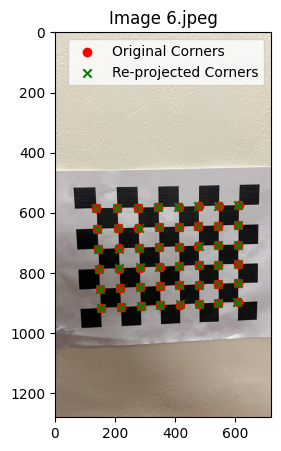

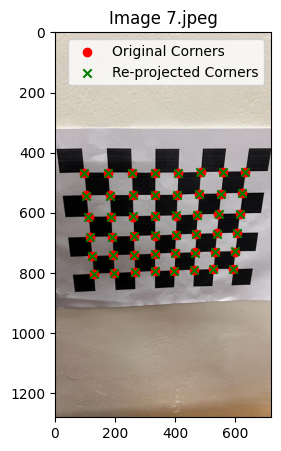

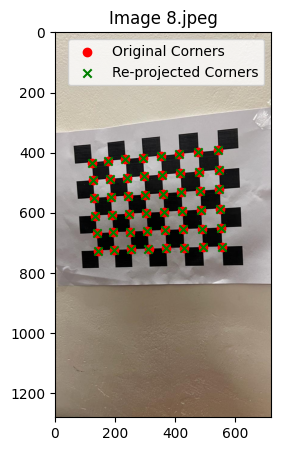

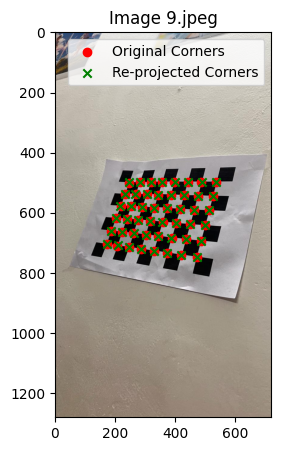

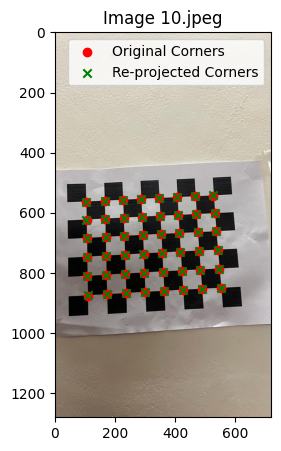

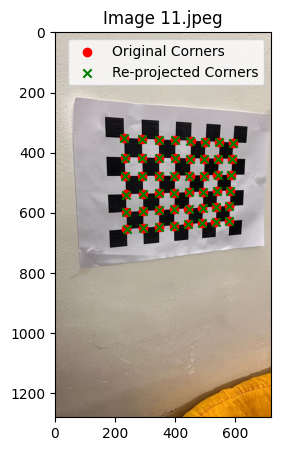

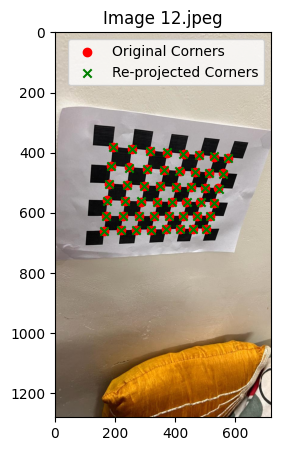

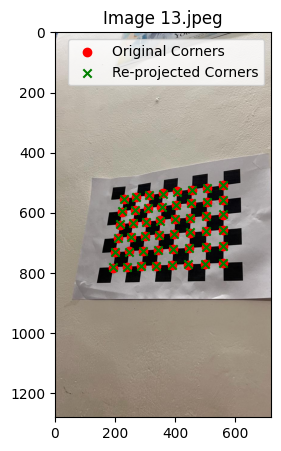

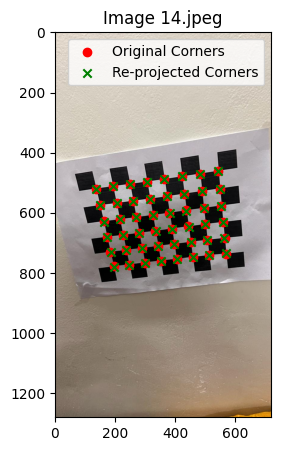

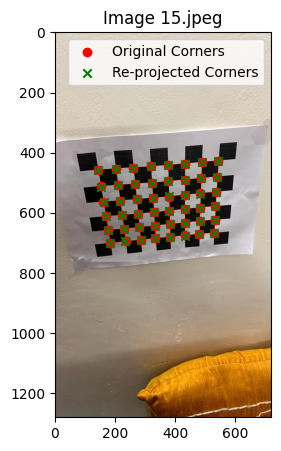

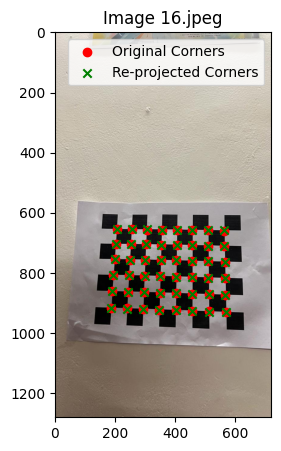

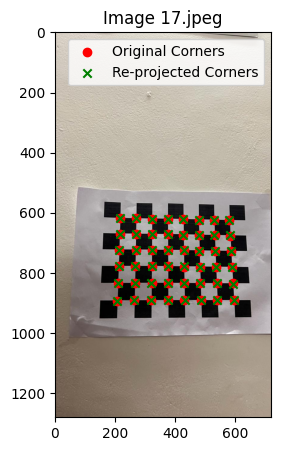

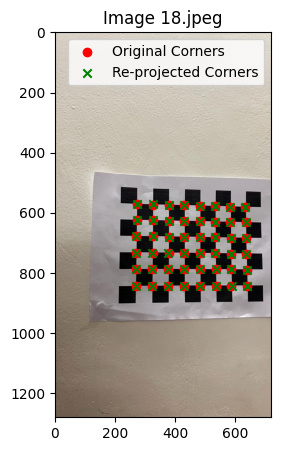

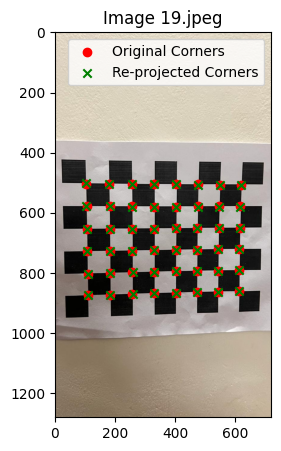

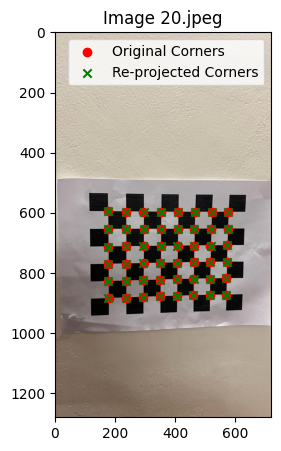

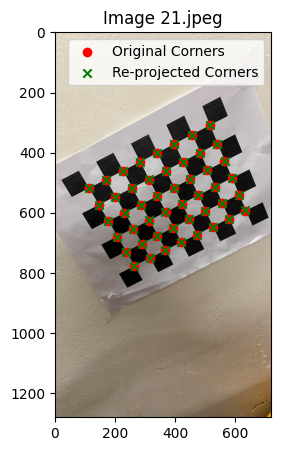

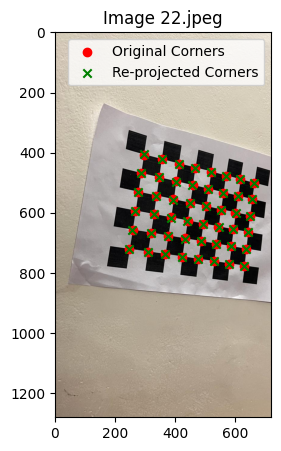

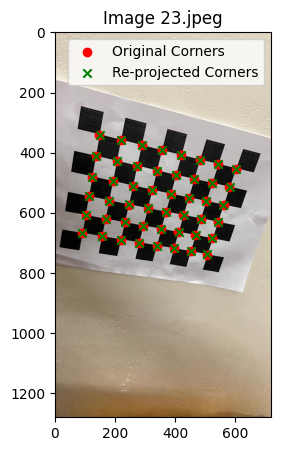

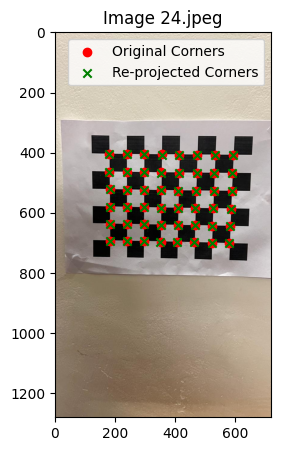

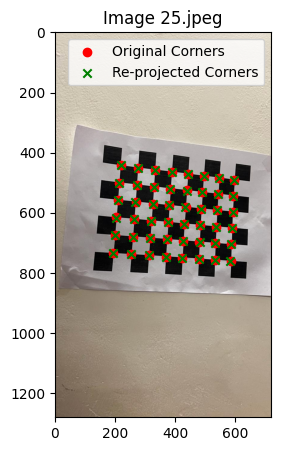

In [172]:
for i in range(25):
    image = cv2.imread(input_dir + f"{i+1}.jpeg")
    plt.figure(figsize=(10,5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.scatter(all_image_points[i][:, 0, 0], all_image_points[i][:, 0, 1], marker='o', color='r', label="Original Corners")
    plt.scatter(reproj_image_points[i][:, 0, 0], reproj_image_points[i][:, 0, 1], marker='x', color='g', label="Re-projected Corners")
    plt.title(f"Image {i+1}.jpeg")
    plt.legend()
    plt.show()

In [173]:
normals = []
for i in range(25):
    R_, _ = cv2.Rodrigues(R[i])
    cur_normal = R_[:, 2]
    normals.append(cur_normal)
    print(f"Checkerboard Plane Normal for Image {i+1}: {cur_normal}")

Checkerboard Plane Normal for Image 1: [-0.07653662 -0.14603959  0.98631363]
Checkerboard Plane Normal for Image 2: [-0.38593196 -0.30779928  0.86966438]
Checkerboard Plane Normal for Image 3: [-0.27056215 -0.09590634  0.95791341]
Checkerboard Plane Normal for Image 4: [-0.16539831  0.16256005  0.97273718]
Checkerboard Plane Normal for Image 5: [-0.39754136  0.19241687  0.8971826 ]
Checkerboard Plane Normal for Image 6: [-0.08367022 -0.12463017  0.98866911]
Checkerboard Plane Normal for Image 7: [-0.10263293 -0.3992648   0.91107305]
Checkerboard Plane Normal for Image 8: [ 0.18869084 -0.0635797   0.97997622]
Checkerboard Plane Normal for Image 9: [0.45477004 0.40255344 0.79444001]
Checkerboard Plane Normal for Image 10: [-0.02246341  0.12531375  0.99186282]
Checkerboard Plane Normal for Image 11: [-0.39772862 -0.1859554   0.8984612 ]
Checkerboard Plane Normal for Image 12: [-0.34642613 -0.52644259  0.77643231]
Checkerboard Plane Normal for Image 13: [0.35757467 0.40151073 0.84316635]
C

In [174]:
extrinsic_parameters = []
for i in range(25):
    R_, _ = cv2.Rodrigues(R[i])
    t_ = t[i]
    extrinsic_parameters.append({"image_id": i+1, "rotation_matrix": R_.tolist(), "translation_vector": t_.tolist()})

In [175]:
calibration_info = {
    "intrinsic_parameters": {
        "focal_length": [fx, fy],
        "skew": skew,
        "principal_point": [cx, cy]
    },
    "extrinsic_parameters": extrinsic_parameters,
    "radial_distortion_coefficients": [distortion[0][0], distortion[0][1], distortion[0][4]],
    "reprojection_errors": {"mean_error": np.mean(errors), "std_dev": np.std(errors)}
}

In [176]:
import json

with open("camera_calibration.json", "w") as f:
    json.dump(calibration_info, f)